In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


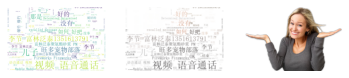

In [11]:


# 10号词云：《爱丽丝漫游仙境》词云（按模板填色）
# B站专栏：同济子豪兄 2019-5-23

# 导入绘图库matplotlib和词云制作库wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator

# 将外部文件包含的文本保存在text变量中
text = open('/content/drive/MyDrive/iss/NLP/perfectmom/data/mom.txt').read()

# 导入imageio库中的imread函数，并用这个函数读取本地图片queen2.jfif，作为词云形状图片
import imageio
mk = imageio.imread("/content/drive/MyDrive/iss/NLP/perfectmom/Mom.png")

# 构建词云对象w
wc = WordCloud(background_color="white",font_path="/content/drive/MyDrive/iss/NLP/perfectmom/simsun.ttf",
               mask=mk,)
# 将text字符串变量传入w的generate()方法，给词云输入文字
wc.generate(text)

# 调用wordcloud库中的ImageColorGenerator()函数，提取模板图片各部分的颜色
image_colors = ImageColorGenerator(mk)

# 显示原生词云图、按模板图片颜色的词云图和模板图片，按左、中、右显示
fig, axes = plt.subplots(1, 3)
# 最左边的图片显示原生词云图
axes[0].imshow(wc)
# 中间的图片显示按模板图片颜色生成的词云图，采用双线性插值的方法显示颜色
axes[1].imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
# 右边的图片显示模板图片
axes[2].imshow(mk, cmap=plt.cm.gray)
for ax in axes:
    ax.set_axis_off()
plt.show()

# 给词云对象按模板图片的颜色重新上色
wc_color = wc.recolor(color_func=image_colors)
# 将词云图片导出到当前文件夹
wc_color.to_file('/content/drive/MyDrive/iss/NLP/perfectmom/Mom-wordcloud.png')

In [24]:
import pandas as pd
import pandas as pd
import numpy as np
from plotly import __version__
%matplotlib inline
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
# Load the dataset into a pandas dataframe.
df_mom = pd.read_csv("/content/drive/MyDrive/iss/NLP/perfectmom/data/dialog_mom", header=0, names=['index','mom_sentence','sentiment','sentiment_score'])
df_son = pd.read_csv("/content/drive/MyDrive/iss/NLP/perfectmom/data/dialog_son", header=0, names=['index','son_sentence','sentiment','sentiment_score'])

# Display the first 10 rows from the data.

x1 =df_son["sentiment_score"]
x0  = df_mom["sentiment_score"]

# x1.iplot(
#     kind='hist',
#     bins=50,
#     xTitle='polarity',
#     linecolor='black',
#     yTitle='count',
#     title='Sentiment Polarity Distribution')


trace1 = go.Histogram(
    x=x0, name='Mom',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'Son',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of Sentiment polarity on dialog')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

In [16]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 2.0 MB/s 
